## 2.1.2. Bài làm mẫu  
### Bài toán 1: Xây dựng cây quyết định và rừng cây với dữ liệu "Default of Credit Card Clients"
---
**Nguồn dữ liệu:** [https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset)

#### Nhiệm vụ 1: Xây dựng cây quyết định bằng thư viện Scikit-Learn

### 1. Cài đặt và import các thư viện cần thiết

In [2]:
!pip install numpy pandas matplotlib scikit-learn graphviz


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline
mpl.rcParams['figure.dpi'] = 100

### 2. Nạp dữ liệu và loại bỏ các biến không cần thiết

In [4]:
import pandas as pd
df = pd.read_csv('UCI_Credit_Card.csv')
df.head()
features_response = df.columns.tolist()

items_to_remove = [
    'ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'EDUCATION_CAT', 'graduate school', 'high school', 'none',
    'others', 'university'
]

features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default.payment.next.month']

### 3. Chuẩn bị dữ liệu cho tập train và tập test

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default.payment.next.month'].values,
    test_size=0.2,
    random_state=24
)

### 4. Xây dựng cây quyết định từ lớp DecisionTreeClassifier có trong thư viện Scikit-Learn

In [6]:
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


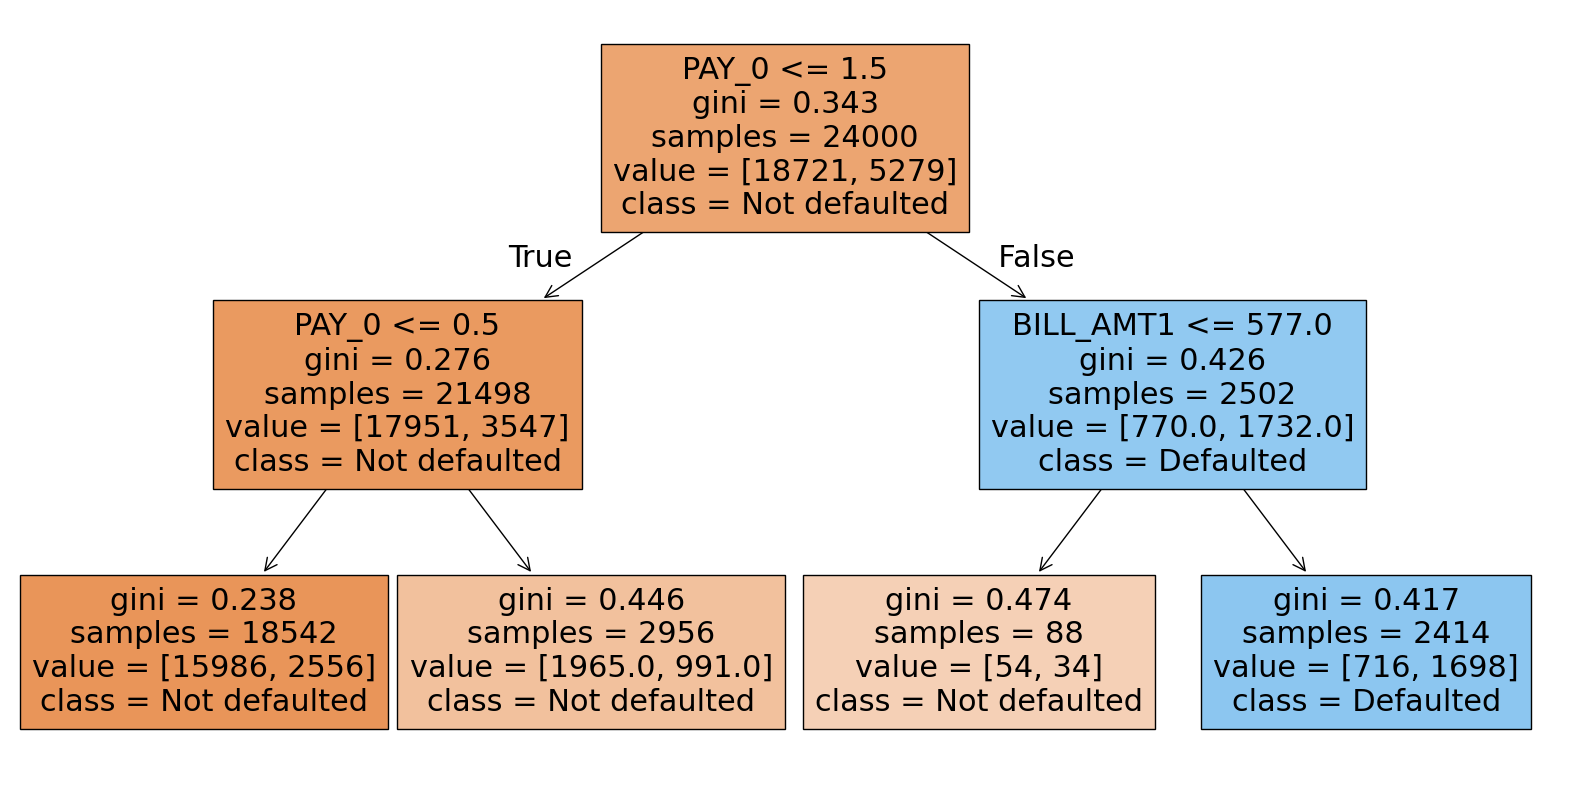

In [7]:
import graphviz
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
tree.plot_tree(
    dt,
    feature_names=features_response[:-1],
    class_names=['Not defaulted', 'Defaulted'],
    filled=True
)
plt.savefig("decision_tree.png", dpi=300, bbox_inches='tight')
plt.show()

### Nhiệm vụ 2: Tìm tham số tối ưu cho cây quyết định bằng GridSearchCV và vẽ biểu đồ đánh giá mô 


### 1. Chuẩn bị dữ liệu

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline
mpl.rcParams['figure.dpi'] = 100

In [9]:
import pandas as pd
df = pd.read_csv('UCI_Credit_Card.csv')
df.head()
features_response = df.columns.tolist()

items_to_remove = [
    'ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'EDUCATION_CAT', 'graduate school', 'high school', 'none',
    'others', 'university'
]

features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default.payment.next.month']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default.payment.next.month'].values,
    test_size=0.2,
    random_state=24
)

### 2. Tạo cây quyết định và xác định các giá trị tham số có thể chọn để tìm tham số tối ưu

In [11]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [1, 2, 4, 6, 8, 10, 12]}
dt = tree.DecisionTreeClassifier(random_state=24)

cv = GridSearchCV(
    dt,
    param_grid=params,
    scoring='roc_auc',       
    n_jobs=None,
    refit=True,
    cv=4,                     
    verbose=1,
    error_score=np.nan,
    return_train_score=True
)

cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


,estimator,DecisionTreeC...ndom_state=24)
,param_grid,"{'max_depth': [1, 2, ...]}"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,4
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,criterion,'gini'


## Giải thích tham số:

scoring='roc_auc': dùng diện tích dưới đường cong ROC để đánh giá

cv=4: chia dữ liệu thành 4 phần để cross-validation

return_train_score=True: lưu cả điểm train để so sánh bias và variance

### 3. Vẽ biểu đồ đánh giá mô hình với các tham số chiều sâu của cây khác nhau

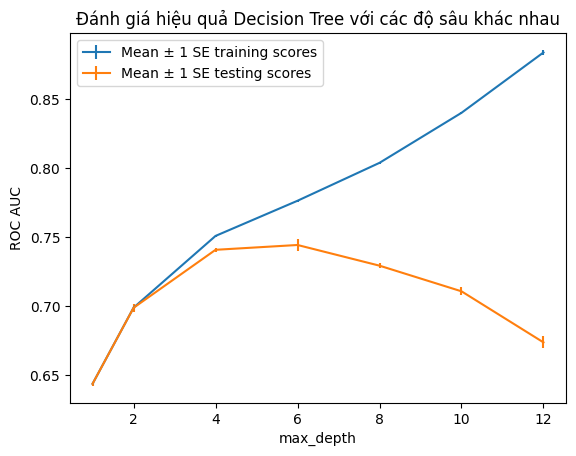

**Hình 2.2**: Biểu đồ đánh giá hiệu quả thực hiện cây quyết định với cá chiều sâu khác nhau.

In [12]:
cv_results_df = pd.DataFrame(cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_train_score', 'mean_test_score']].head()

ax = plt.axes()

# Vẽ đường train
ax.errorbar(
    cv_results_df['param_max_depth'],
    cv_results_df['mean_train_score'],
    yerr=cv_results_df['std_train_score']/np.sqrt(4),
    label='Mean ± 1 SE training scores'
)

# Vẽ đường test
ax.errorbar(
    cv_results_df['param_max_depth'],
    cv_results_df['mean_test_score'],
    yerr=cv_results_df['std_test_score']/np.sqrt(4),
    label='Mean ± 1 SE testing scores'
)

ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')
plt.title('Đánh giá hiệu quả Decision Tree với các độ sâu khác nhau')
plt.savefig("decision_tree_depth.png", dpi=300, bbox_inches='tight')
plt.show()

from IPython.display import Markdown, display
display(Markdown("**Hình 2.2**: Biểu đồ đánh giá hiệu quả thực hiện cây quyết định với cá chiều sâu khác nhau."))

### Nhiệm vụ 3: Nhiệm vụ 3: Xây dựng rừng cây (random forest)

## 1. Thực hiện 1, 2 và 3 như ở nhiệm vụ 1 để tải thư viện, nạp dữ liệu và chuẩn bị dữ liệu

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline
mpl.rcParams['figure.dpi'] = 100

In [14]:
import pandas as pd
df = pd.read_csv('UCI_Credit_Card.csv')
df.head()
features_response = df.columns.tolist()

items_to_remove = [
    'ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'EDUCATION_CAT', 'graduate school', 'high school', 'none',
    'others', 'university'
]

features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default.payment.next.month']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default.payment.next.month'].values,
    test_size=0.2,
    random_state=24
)

## 2. Tạo rừng cây với lớp RandomForestClassifier trong Scikit-Learn

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier\
 (n_estimators=10, criterion='gini', max_depth=3,
 min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
 max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0,
 bootstrap=True, oob_score=False, n_jobs=None,
 random_state=4, verbose=0, warm_start=False, class_weight=None)

## 3. Tìm tham số tối ưu cho mô hình rừng cây và thực hiện train với tham số tối ưu đó

In [17]:
from sklearn.model_selection import GridSearchCV

rf_params_ex = {'n_estimators': list(range(10, 110, 10))}

cv_rf_ex = GridSearchCV(
    rf,
    param_grid=rf_params_ex,
    scoring='roc_auc',
    refit=True,
    cv=4,
    verbose=1,
    error_score=np.nan,
    return_train_score=True
)

cv_rf_ex.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


,estimator,RandomForestC...andom_state=4)
,param_grid,"{'n_estimators': [10, 20, ...]}"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,4
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,60


## 4. Vẽ biểu đồ đánh giá mô hình rừng cây với các tham số số cây có trong rừng khác nhau

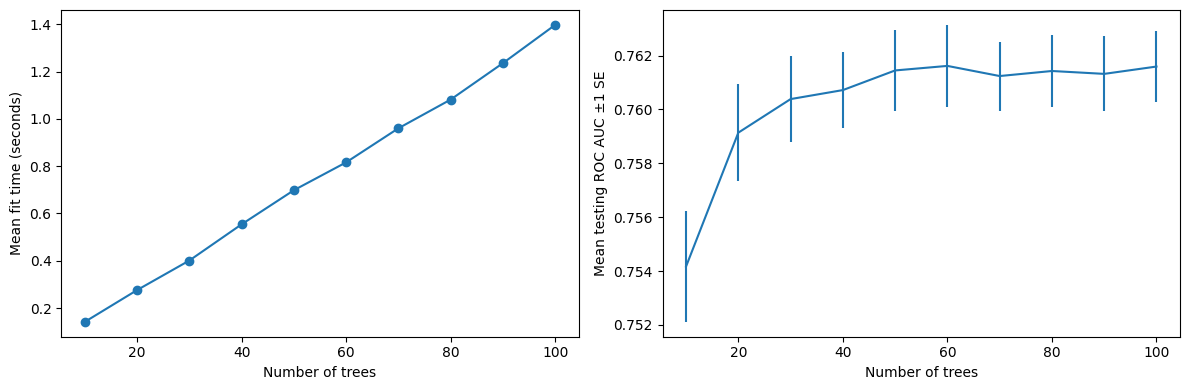

**Hình 2.3**: Biểu đồ thể hiện mối quan hệ giữa số cây với Mean Fit Time và Mean Testing ROC AUC.

In [18]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Biểu đồ 1: Mean fit time
axs[0].plot(
    cv_rf_ex_results_df['param_n_estimators'],
    cv_rf_ex_results_df['mean_fit_time'],
    '-o'
)
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')

# Biểu đồ 2: Mean testing ROC AUC
axs[1].errorbar(
    cv_rf_ex_results_df['param_n_estimators'],
    cv_rf_ex_results_df['mean_test_score'],
    yerr=cv_rf_ex_results_df['std_test_score'] / np.sqrt(4)
)
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC ±1 SE')
plt.tight_layout()
plt.savefig("roc_auc.png", dpi=300, bbox_inches='tight')
plt.show()

display(Markdown("**Hình 2.3**: Biểu đồ thể hiện mối quan hệ giữa số cây với Mean Fit Time và Mean Testing ROC AUC."))


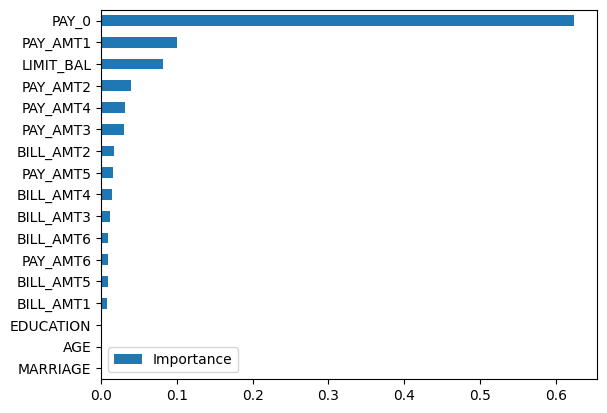

**Hình 2.4**: Biểu đồ hiển thị mức độ quan trọng của từng feature trong mô hình Random Forest tối ưu.

In [19]:
# {'n_estimators': 50}
cv_rf_ex.best_params_

# the feature names and importances
feat_imp_df = pd.DataFrame({
    'Importance': cv_rf_ex.best_estimator_.feature_importances_},
    index=features_response[:-1]
)

feat_imp_df.sort_values('Importance', ascending=True).plot.barh()

# 💾 Lưu ảnh trước khi hiển thị
plt.savefig("feature_importance.png", dpi=300, bbox_inches='tight')

plt.show()

from IPython.display import Markdown, display
display(Markdown("**Hình 2.4**: Biểu đồ hiển thị mức độ quan trọng của từng feature trong mô hình Random Forest tối ưu."))

### 2.1.3. Bài tập thực hành 1
Xây dựng cây quyết định và rừng cây trên dữ liệu Titanic lấy từ 
---
**Nguồn dữ liệu:** [https://www.kaggle.com/code/dmilla/introduction-to-decision-trees-titanic-dataset](https://www.kaggle.com/code/dmilla/introduction-to-decision-trees-titanic-dataset)

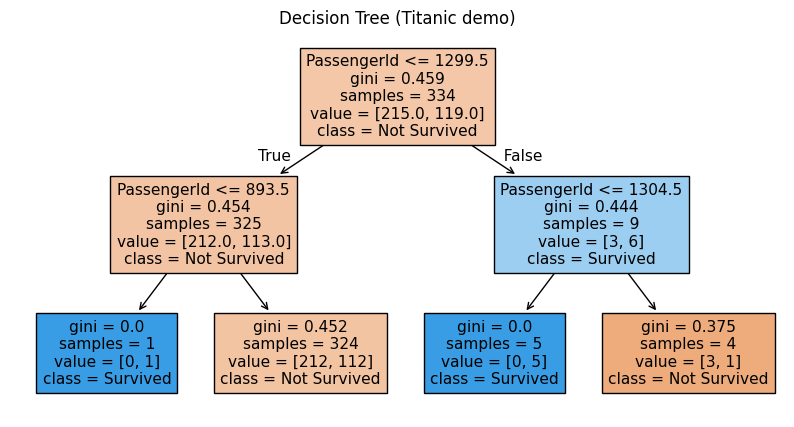

**Hình 1**: Cây quyết định huấn luyện từ dữ liệu Titanic demo.

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

# 1. Đọc dữ liệu
df = pd.read_csv("gender_submission.csv")

# Gắn nhãn
X = df[['PassengerId']].values
y = df['Survived'].values

# 2. Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=24)

# 3. Huấn luyện Decision Tree
dt = tree.DecisionTreeClassifier(max_depth=2, random_state=24)
dt.fit(X_train, y_train)

# 4. Vẽ cây quyết định
plt.figure(figsize=(10,5))
tree.plot_tree(dt, feature_names=['PassengerId'],
               class_names=['Not Survived','Survived'],
               filled=True)
plt.title("Decision Tree (Titanic demo)")
plt.savefig("decision_tree_titanic.png", dpi=300, bbox_inches='tight')
plt.show()

display(Markdown("**Hình 1**: Cây quyết định huấn luyện từ dữ liệu Titanic demo."))

Fitting 4 folds for each of 10 candidates, totalling 40 fits


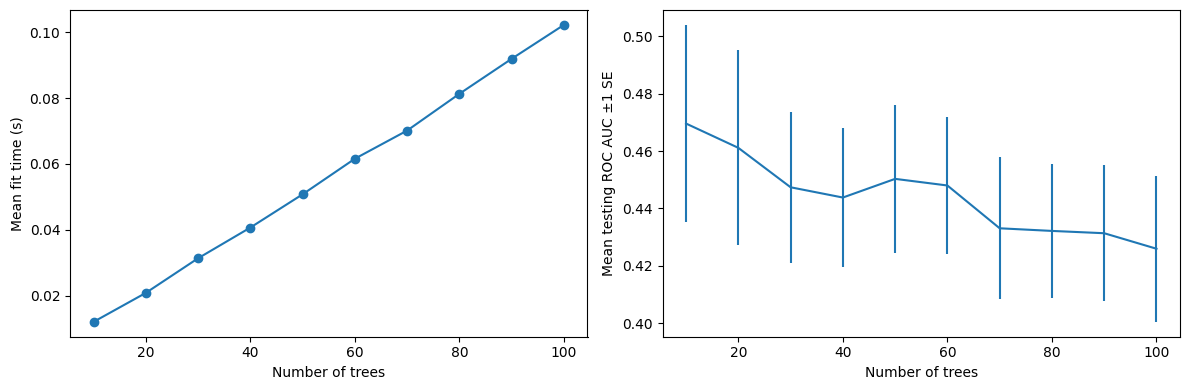

**Hình 3**: Biểu đồ mối quan hệ giữa số cây trong Random Forest với thời gian huấn luyện và ROC AUC.

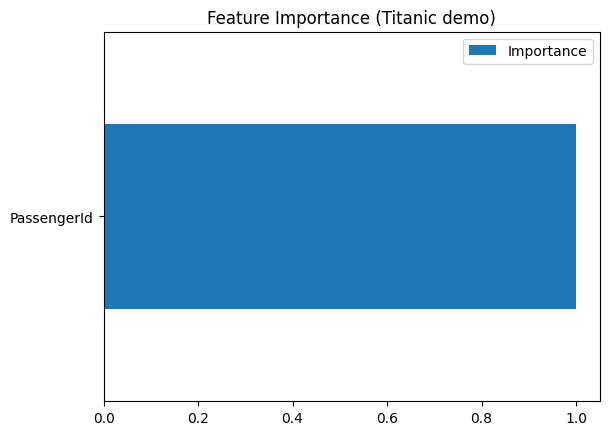

**Hình 4**: Biểu đồ mức độ quan trọng của đặc trưng trong Random Forest.

In [22]:
from sklearn.ensemble import RandomForestClassifier

# --- 1. Khởi tạo mô hình Random Forest ---
rf = RandomForestClassifier(max_depth=3, random_state=4)

# --- 2. GridSearchCV để tìm số cây tối ưu ---
rf_params = {'n_estimators': list(range(10,110,10))}
cv_rf = GridSearchCV(rf, param_grid=rf_params,
                     scoring='roc_auc', cv=4,
                     return_train_score=True, verbose=1)
cv_rf.fit(X_train, y_train)

# --- 3. Vẽ biểu đồ số cây vs thời gian + ROC AUC ---
cv_rf_results_df = pd.DataFrame(cv_rf.cv_results_)

fig, axs = plt.subplots(1,2, figsize=(12,4))
axs[0].plot(cv_rf_results_df['param_n_estimators'], cv_rf_results_df['mean_fit_time'], '-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (s)')

axs[1].errorbar(cv_rf_results_df['param_n_estimators'],
                cv_rf_results_df['mean_test_score'],
                yerr=cv_rf_results_df['std_test_score']/4**0.5)
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC ±1 SE')

plt.tight_layout()
plt.savefig("random_forest_titanic.png", dpi=300, bbox_inches='tight')
plt.show()

display(Markdown("**Hình 3**: Biểu đồ mối quan hệ giữa số cây trong Random Forest với thời gian huấn luyện và ROC AUC."))

# --- 4. Feature Importance ---
feat_imp_df = pd.DataFrame({
    'Importance': cv_rf.best_estimator_.feature_importances_
}, index=['PassengerId'])

feat_imp_df.sort_values('Importance', ascending=True).plot.barh()
plt.title("Feature Importance (Titanic demo)")
plt.savefig("feature_importance_titanic.png", dpi=300, bbox_inches='tight')
plt.show()

display(Markdown("**Hình 4**: Biểu đồ mức độ quan trọng của đặc trưng trong Random Forest."))
